In [ ]:
# pandas.read_json
# !pip install fsspec

In [ ]:
import requests
import pandas as pd

In [ ]:
url_pokemon = 'https://pokeapi.co/api/v2/pokemon/'

payload = {
    'limit': 10,
    'offset': 0
}

In [ ]:
response = requests.get(url=url_pokemon, params=payload)

response.status_code

200

In [ ]:
response.json()

{'count': 1118,
 'next': 'https://pokeapi.co/api/v2/pokemon/?offset=10&limit=10',
 'previous': None,
 'results': [{'name': 'bulbasaur',
   'url': 'https://pokeapi.co/api/v2/pokemon/1/'},
  {'name': 'ivysaur', 'url': 'https://pokeapi.co/api/v2/pokemon/2/'},
  {'name': 'venusaur', 'url': 'https://pokeapi.co/api/v2/pokemon/3/'},
  {'name': 'charmander', 'url': 'https://pokeapi.co/api/v2/pokemon/4/'},
  {'name': 'charmeleon', 'url': 'https://pokeapi.co/api/v2/pokemon/5/'},
  {'name': 'charizard', 'url': 'https://pokeapi.co/api/v2/pokemon/6/'},
  {'name': 'squirtle', 'url': 'https://pokeapi.co/api/v2/pokemon/7/'},
  {'name': 'wartortle', 'url': 'https://pokeapi.co/api/v2/pokemon/8/'},
  {'name': 'blastoise', 'url': 'https://pokeapi.co/api/v2/pokemon/9/'},
  {'name': 'caterpie', 'url': 'https://pokeapi.co/api/v2/pokemon/10/'}]}

In [ ]:
links = response.json()['results']

links

[{'name': 'bulbasaur', 'url': 'https://pokeapi.co/api/v2/pokemon/1/'},
 {'name': 'ivysaur', 'url': 'https://pokeapi.co/api/v2/pokemon/2/'},
 {'name': 'venusaur', 'url': 'https://pokeapi.co/api/v2/pokemon/3/'},
 {'name': 'charmander', 'url': 'https://pokeapi.co/api/v2/pokemon/4/'},
 {'name': 'charmeleon', 'url': 'https://pokeapi.co/api/v2/pokemon/5/'},
 {'name': 'charizard', 'url': 'https://pokeapi.co/api/v2/pokemon/6/'},
 {'name': 'squirtle', 'url': 'https://pokeapi.co/api/v2/pokemon/7/'},
 {'name': 'wartortle', 'url': 'https://pokeapi.co/api/v2/pokemon/8/'},
 {'name': 'blastoise', 'url': 'https://pokeapi.co/api/v2/pokemon/9/'},
 {'name': 'caterpie', 'url': 'https://pokeapi.co/api/v2/pokemon/10/'}]

In [ ]:
 df_links = pd.json_normalize(links)

 df_links

,name,url
0,bulbasaur,https://pokeapi.co/api/v2/pokemon/1/
1,ivysaur,https://pokeapi.co/api/v2/pokemon/2/
2,venusaur,https://pokeapi.co/api/v2/pokemon/3/
3,charmander,https://pokeapi.co/api/v2/pokemon/4/
4,charmeleon,https://pokeapi.co/api/v2/pokemon/5/
5,charizard,https://pokeapi.co/api/v2/pokemon/6/
6,squirtle,https://pokeapi.co/api/v2/pokemon/7/
7,wartortle,https://pokeapi.co/api/v2/pokemon/8/
8,blastoise,https://pokeapi.co/api/v2/pokemon/9/
9,caterpie,https://pokeapi.co/api/v2/pokemon/10/


In [ ]:
pk_req = []

for link in links:
  pk_req.append(requests.get(link['url']))

pokemons = [p.json() for p in pk_req]

pokemons[0]

{'abilities': [{'ability': {'name': 'overgrow',
    'url': 'https://pokeapi.co/api/v2/ability/65/'},
   'is_hidden': False,
   'slot': 1},
  {'ability': {'name': 'chlorophyll',
    'url': 'https://pokeapi.co/api/v2/ability/34/'},
   'is_hidden': True,
   'slot': 3}],
 'base_experience': 64,
 'forms': [{'name': 'bulbasaur',
   'url': 'https://pokeapi.co/api/v2/pokemon-form/1/'}],
 'game_indices': [{'game_index': 153,
   'version': {'name': 'red', 'url': 'https://pokeapi.co/api/v2/version/1/'}},
  {'game_index': 153,
   'version': {'name': 'blue', 'url': 'https://pokeapi.co/api/v2/version/2/'}},
  {'game_index': 153,
   'version': {'name': 'yellow',
    'url': 'https://pokeapi.co/api/v2/version/3/'}},
  {'game_index': 1,
   'version': {'name': 'gold', 'url': 'https://pokeapi.co/api/v2/version/4/'}},
  {'game_index': 1,
   'version': {'name': 'silver',
    'url': 'https://pokeapi.co/api/v2/version/5/'}},
  {'game_index': 1,
   'version': {'name': 'crystal',
    'url': 'https://pokeapi.co/

In [ ]:
df_pk = pd.json_normalize(pokemons, ['moves'], ['name', ['sprites', 'front_default']], errors='ignore')

df_pk[df_pk['name'] == 'bulbasaur'].head(20)

,version_group_details,move.name,move.url,name,sprites.front_default
0,"[{'level_learned_at': 0, 'move_learn_method': ...",razor-wind,https://pokeapi.co/api/v2/move/13/,bulbasaur,https://raw.githubusercontent.com/PokeAPI/spri...
1,"[{'level_learned_at': 0, 'move_learn_method': ...",swords-dance,https://pokeapi.co/api/v2/move/14/,bulbasaur,https://raw.githubusercontent.com/PokeAPI/spri...
2,"[{'level_learned_at': 0, 'move_learn_method': ...",cut,https://pokeapi.co/api/v2/move/15/,bulbasaur,https://raw.githubusercontent.com/PokeAPI/spri...
3,"[{'level_learned_at': 0, 'move_learn_method': ...",bind,https://pokeapi.co/api/v2/move/20/,bulbasaur,https://raw.githubusercontent.com/PokeAPI/spri...
4,"[{'level_learned_at': 13, 'move_learn_method':...",vine-whip,https://pokeapi.co/api/v2/move/22/,bulbasaur,https://raw.githubusercontent.com/PokeAPI/spri...
5,"[{'level_learned_at': 0, 'move_learn_method': ...",headbutt,https://pokeapi.co/api/v2/move/29/,bulbasaur,https://raw.githubusercontent.com/PokeAPI/spri...
6,"[{'level_learned_at': 1, 'move_learn_method': ...",tackle,https://pokeapi.co/api/v2/move/33/,bulbasaur,https://raw.githubusercontent.com/PokeAPI/spri...
7,"[{'level_learned_at': 0, 'move_learn_method': ...",body-slam,https://pokeapi.co/api/v2/move/34/,bulbasaur,https://raw.githubusercontent.com/PokeAPI/spri...
8,"[{'level_learned_at': 0, 'move_learn_method': ...",take-down,https://pokeapi.co/api/v2/move/36/,bulbasaur,https://raw.githubusercontent.com/PokeAPI/spri...
9,"[{'level_learned_at': 0, 'move_learn_method': ...",double-edge,https://pokeapi.co/api/v2/move/38/,bulbasaur,https://raw.githubusercontent.com/PokeAPI/spri...


In [ ]:
pokemons[0]['sprites']['front_default']

'https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/1.png'

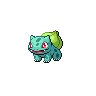

bulbasaur


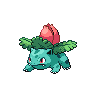

ivysaur


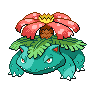

venusaur


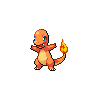

charmander


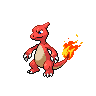

charmeleon


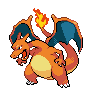

charizard


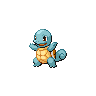

squirtle


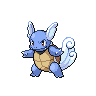

wartortle


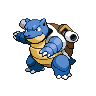

blastoise


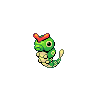

caterpie


In [ ]:
from IPython.display import Image


for p in pokemons:
  display(Image(p['sprites']['front_default']))
  print(p['name'])

# Async

In [ ]:
%%sh
python --version

Python 3.7.11


In [ ]:
!pip install httpx # asyncio nest_asyncio

     |████████████████████████████████| 77 kB 3.2 MB/s 
     |████████████████████████████████| 58 kB 5.9 MB/s 
     |████████████████████████████████| 54 kB 3.1 MB/s 
     |████████████████████████████████| 77 kB 6.0 MB/s 


In [ ]:
# import nest_asyncio

# nest_asyncio.apply()

In [ ]:
from asyncio import gather, run, get_running_loop, create_task
from httpx import AsyncClient


base_url = 'https://pokeapi.co/api/v2/pokemon/{number}'


async def downlaod(number):
    async with AsyncClient() as client:
        response = await client.get(
            base_url.format(number=number),
            timeout=None
        )
        print(number)
        return number, response.json()['name']


async def coro(start, stop):
    return await gather(
        *[downlaod(number) for number in range(start, stop)]
    )

from pprint import pprint
# result = run(coro(1, 5))
# pprint(result)

# loop = get_running_loop()
task = create_task(coro(1, 5))

# Not run task.result(), wait this cell first

In [ ]:
task.result()

[(1, 'bulbasaur'), (2, 'ivysaur'), (3, 'venusaur'), (4, 'charmander')]

In [ ]:
import asyncio

async def main():
    print(1)

loop = asyncio.get_running_loop()

tsk = loop.create_task(main())

tsk.add_done_callback(
    lambda t: print(f'Task done: '
    f'{t.result()} << return val of main()'))